In [2]:
import undetected_chromedriver as uc
from bs4 import BeautifulSoup
import time

### 수집

**IM뱅크 뉴스기사 100개씩 긁어오기**

- 제목 참고자료
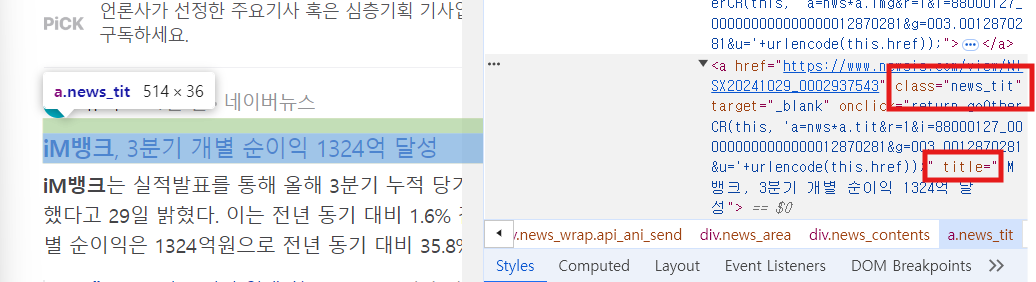

In [3]:
driver = uc.Chrome()
driver.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=im%EB%B1%85%ED%81%AC&oquery=im%EB%B1%85%ED%81%AC&tqi=iyaG8dqps8wssAz8gTsssssstEl-310887")

In [ ]:
box1 = []
while True:
    #selenum이 보고있는 페이지 소스를 바로 파이썬이 읽을 수 있는 형태로 변경
    html = BeautifulSoup(driver.page_source)

    #페이지의 큰 틀(find)을 잡고 그 안에 여러 뉴스 기사들(find_all) 긁어오기
    news = html.find("ul", class_ = "list_news _infinite_list").find_all("li", class_ = "bx") 
    
    #제목 긁어오는데 100개 긁어오기
    for i in news:
        a = i.find("a", class_ = "news_tit")['title'].strip()
        if a not in box1:
            box1.append(a)
            if len(box1) == 100:
                break
    if len(box1) == 100:
        break

    # 파이썬에서 자바스크립트 관련 행위를 할 수 있게 해주는 코드
    ## 휠을 한번에 끝까지 내리겠다
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(3)
    print(f"{len(box1)}개 뉴스기사 수집")

**신한은행 뉴스기사 100개씩 긁어오기**

In [ ]:
driver = uc.Chrome()
driver.get("https://search.naver.com/search.naver?sm=tab_hty.top&where=news&ssc=tab.news.all&query=%EC%8B%A0%ED%95%9C%EC%9D%80%ED%96%89&oquery=im%EB%B1%85%ED%81%AC&tqi=iyaH6dpzLiwssZGx3MCssssstwN-393936")

In [ ]:
box2 = []
while True:
    html = BeautifulSoup(driver.page_source)

    news = html.find("ul", class_ = "list_news _infinite_list").find_all("li", class_ = "bx") 
    
    for i in news:
        a = i.find("a", class_ = "news_tit")['title'].strip()
        if a not in box2:
            box2.append(a)
            if len(box2) == 100:
                break
    if len(box2) == 100:
        break

    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    time.sleep(3)
    print(f"{len(box2)}개 뉴스기사 수집")

**데이터프레임**

In [ ]:
import pandas as pd

df1 = pd.DataFrame(box1, columns=['내용'])
df1['은행'] = 'IM뱅크'

df2 = pd.DataFrame(box2, columns=['내용'])
df2['은행'] = '신한은행'

df = pd.concat([df1, df2])
df.to_csv('news.csv', index=False)

df

### 자연어 처리

**명사만 출력**

In [7]:
from konlpy.tag import Okt

okt = Okt()

def make_nouns(x):
    return " ".join(okt.nouns(x))

df = pd.read_csv("news.csv")
df["Nouns"] = df['내용'].apply(make_nouns)
df

,내용,은행,Nouns
0,"iM뱅크, 3분기 개별 순이익 1324억 달성",IM뱅크,뱅크 개별 순이익 달성
1,"iM뱅크, 3분기 누적 순이익 3425억원…전년比 1.6% 감소",IM뱅크,뱅크 누적 순이익 년 감소
2,3분기 iM뱅크 호실적에도 DGB금융 순이익 10.7% 감소,IM뱅크,뱅크 호실 금융 순이익 감소
3,"DGB금융, 순이익 40% 줄었지만…iM뱅크 '분기 최대'·자사주 1500억원 소각",IM뱅크,금융 순이익 뱅크 분기 최대 자 사주 소각
4,"DGB금융그룹, 2027년까지 자사주 1500억원 소각···주가 개선 추진",IM뱅크,금융 그룹 자 사주 소각 주가 개선 추진
...,...,...,...
195,"""무역금융 디지털화 선도""...신한은행, 포스코인터내셔널과 전략적 업무협약",신한은행,무역 금융 디지털화 선도 신한은행 포스코 인터내셔널 전략 업무 협약
196,"육군, ‘신한은행’ 등 ‘전역 장병 채용 우수기업 초청간담회’ 개최",신한은행,육군 신한은행 등 전역 장병 채용 우수 기업 초청 간담 회 개최
197,"금융권 책무구조도 윤곽... 신한·하나 '선제 도입', 농협·우리 '눈치'",신한은행,금융 책무 구조도 윤곽 신한 하나 선제 도입 농협 우리 눈치
198,"NH농협과 신한은행 지역 공공금고 81% 차지, 민주당 김현정 ""지역금융과 나눠야""",신한은행,농협 신한은행 지역 금고 차지 민주당 김현정 지역 금융


**벡터로 변경하기**\
: 단어가 몇개 있는지 세어서 벡터화

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

cv_matrix = cv.fit_transform(df['Nouns'])
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

각 열의 단어 확인

In [11]:
cv.get_feature_names_out()

array(['가계', '가상', '가세', '가정', '간담', '감독', '감사', '감소', '강조', '강화', '개막전',
       '개별', '개선', '개인', '개최', '거래', '게시판', '격차', '격파', '결제', '경영', '경쟁력',
       '경제', '경험', '계층', '고객', '고삐', '공단', '공인', '공헌', '과자', '관리', '교류',
       '교육', '교육청', '구금', '구조도', '구축', '국내', '국무총리', '국민은행', '그룹', '글로벌',
       '금감원', '금고', '금리', '금융', '금융가', '급선무', '기대', '기쁨', '기술', '기업',
       '기업은행', '기준', '기획', '길동', '김단비', '김정래', '김현정', '까닭', '나눔', '나단',
       '나라', '나무', '내년', '내부통제', '년도', '년비', '농협', '누적', '눈치', '다문화',
       '다한', '단독', '단비', '단지', '달성', '당국', '대구', '대규모', '대상', '대응', '대출',
       '대학', '대학생', '도입', '도전', '독과점', '동기', '동남', '동시', '동행', '디지털',
       '디지털화', '디펜딩', '라이온즈', '리그', '리딩', '마련', '막대', '막판', '멘털', '면제',
       '무대', '무료', '무역', '문화', '미래', '미흡', '민주', '민주당', '박차', '반영', '발표',
       '방지', '배달', '뱅크', '뱅킹', '벤처기업', '보이스피싱', '부금', '부담', '분기', '브랜드',
       '브리핑', '비대', '빼빼로', '사각', '사고', '사랑', '사업', '사용', '사주', '사활', '사회',
       '산업', '삼성', '상생', '상의', '상태', '상품', '상환', '서비스'

타겟 조정

In [12]:
df['Target'] = [1] * 100 + [0] * 100
df #최종 df

,내용,은행,Nouns,Target
0,"iM뱅크, 3분기 개별 순이익 1324억 달성",IM뱅크,뱅크 개별 순이익 달성,1
1,"iM뱅크, 3분기 누적 순이익 3425억원…전년比 1.6% 감소",IM뱅크,뱅크 누적 순이익 년 감소,1
2,3분기 iM뱅크 호실적에도 DGB금융 순이익 10.7% 감소,IM뱅크,뱅크 호실 금융 순이익 감소,1
3,"DGB금융, 순이익 40% 줄었지만…iM뱅크 '분기 최대'·자사주 1500억원 소각",IM뱅크,금융 순이익 뱅크 분기 최대 자 사주 소각,1
4,"DGB금융그룹, 2027년까지 자사주 1500억원 소각···주가 개선 추진",IM뱅크,금융 그룹 자 사주 소각 주가 개선 추진,1
...,...,...,...,...
195,"""무역금융 디지털화 선도""...신한은행, 포스코인터내셔널과 전략적 업무협약",신한은행,무역 금융 디지털화 선도 신한은행 포스코 인터내셔널 전략 업무 협약,0
196,"육군, ‘신한은행’ 등 ‘전역 장병 채용 우수기업 초청간담회’ 개최",신한은행,육군 신한은행 등 전역 장병 채용 우수 기업 초청 간담 회 개최,0
197,"금융권 책무구조도 윤곽... 신한·하나 '선제 도입', 농협·우리 '눈치'",신한은행,금융 책무 구조도 윤곽 신한 하나 선제 도입 농협 우리 눈치,0
198,"NH농협과 신한은행 지역 공공금고 81% 차지, 민주당 김현정 ""지역금융과 나눠야""",신한은행,농협 신한은행 지역 금고 차지 민주당 김현정 지역 금융,0


### 예측

**문제집 & 정답지**

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x = cv_matrix
y = df['Target'].values

train_x, test_x, train_y, test_y = train_test_split(x, y) #순서지키기

model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

In [21]:
from sklearn.metrics import classification_report

pred = model.predict(test_x)

report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        24

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [31]:
## 돌려보기

text = "iM뱅크가 대구은행이였대"

a = " ".join(okt.nouns(text)) #명사 추출해주기
a = cv.transform([a]).toarray()

model.predict(a) #대구은행이라고 예측

array([1], dtype=int64)

**분류에 도움을 준 단어들 파악**

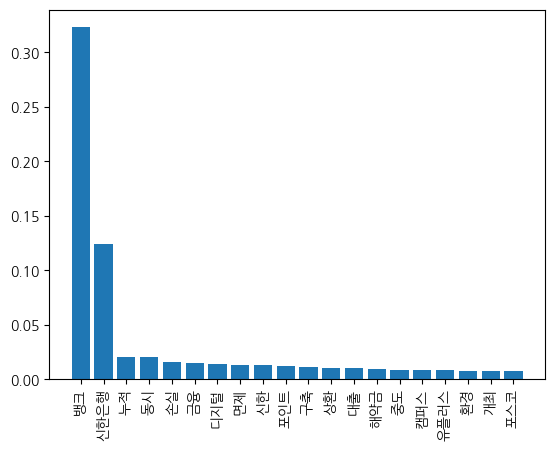

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
#np.argsort(model.feature_importances_)[::-1] -> 117번이 중요도가 제일 높다

idx = np.argsort(model.feature_importances_)[::-1][:20]

#요소 추출해서 x,y로 지정
plt.bar(x = cv.get_feature_names_out()[idx],
           height = model.feature_importances_[idx])

plt.xticks(rotation = 90) #글자 회전
plt.show() 

### 자연어 분석

**참고) 오즈비, Tf-IDF분석를 통해 상대적으로 많이 나온 단어 찾기**

- 연습

In [54]:
from collections import Counter

box1 = [] # IM뱅크 명사
box2 = [] # 신한은행 명사

for i in df[df['은행'] == "IM뱅크"]['Nouns'].str.split():
    box1 += i

for i in df[df['은행'] == "신한은행"]['Nouns'].str.split():
    box2 += i

counter1 = Counter(box1)
counter2 = Counter(box2)

df1 = pd.DataFrame({"Word" : counter1.keys(), "freq" : counter1.values()})
df1['Bank'] = 'IM'

df2 = pd.DataFrame({"Word" : counter2.keys(), "freq" : counter2.values()})
df2['Bank'] = 'Shin'

In [64]:
result = pd.concat([df1, df2])
result = result.pivot_table(index='Word', columns='Bank', values='freq', fill_value=0)

result['IM ratio'] = (result['IM'] + 1) / sum(result['IM'] + 1)
result['Shin ratio'] = (result['Shin'] + 1) / sum(result['Shin'] + 1)
result['Odds ratio'] = result['IM ratio'] / result['Shin ratio']

result.sort_values("Odds ratio")

Bank,IM,Shin,IM ratio,Shin ratio,Odds ratio
Word,,,,,
신한은행,0.0,62.0,0.000823,0.055312,0.014880
상환,0.0,20.0,0.000823,0.018437,0.044640
중도,0.0,20.0,0.000823,0.018437,0.044640
면제,0.0,20.0,0.000823,0.018437,0.044640
대출,0.0,19.0,0.000823,0.017559,0.046872
...,...,...,...,...,...
유플러스,12.0,0.0,0.010700,0.000878,12.186831
동시,13.0,0.0,0.011523,0.000878,13.124280
구축,13.0,0.0,0.011523,0.000878,13.124280


- 적용1

In [60]:
driver = uc.Chrome()
driver.get("https://finance.naver.com/item/board.naver?code=055550&page=1")

<html data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/130.0.0.0 Safari/537.36" lang="ko"><head><script type="text/javascript">
function doSearch() {
	var frm = document.boardSearchFrm;
	var str = frm.sw.value;
	str = str.replace(/^\s*/,'').replace(/\s*$/,'');	// trim
	
	if(str == '') {
		alert("검색어를 입력해 주세요.");
		frm.sw.value = '';
		frm.sw.focus();
	}
	else {
		frm.sw.value = str;
		frm.submit();
	}
}
</script>
<!--  global include -->
<title>신한지주 : 네이버페이 증권</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="네이버페이 증권" name="apple-mobile-web-app-title"/>
<meta content="네이버페이 증권" property="og:title"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="https://finance.naver.com" property="og:url"/>
<m
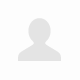
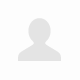

In [46]:
import warnings
warnings.filterwarnings('ignore')

html = BeautifulSoup(driver.page_source)
html

In [56]:
def make_table(html):
    table = html.find("table", class_ = "type2")
    table = pd.read_html(str(table))[0][['날짜', '제목']].dropna().iloc[1:]
    return table

In [61]:
box = []
for n in range(1,101):
    try:
        driver.get(f"https://finance.naver.com/item/board.naver?code=055550&page={n}")
        driver.implicitly_wait(10) #페이지 빨리 가져오기
        html = BeautifulSoup(driver.page_source)
        table = make_table(html)
        box.append(table)
    except:
        continue

In [67]:
review = pd.conca
(box)
review['날짜'] = pd.to_datetime(review['날짜']).dt.date
#review.to_csv("review.csv", index = False)
review

,날짜,제목
3,2024-10-30,악마 기업 [1]
4,2024-10-30,오늘 사면 배당주나요? [2]
5,2024-10-30,거래량의 50%가 프로그램이니
6,2024-10-30,대한독립만세
7,2024-10-30,역시 신한은 다르네 ㅋㅋ
...,...,...
21,2024-03-20,역사점 신고점 언저리 물리면..ㅜㅜ .(... [1]
22,2024-03-20,日시중은행 일제히 금리인상 '단숨에 20...
23,2024-03-20,미-금리 인하 상반기 어려워!!
24,2024-03-20,어르신들만~참고요!!


- 적용2

In [70]:
import FinanceDataReader as fdr
df = fdr.DataReader("NAVER : 055550").reset_index() #네이버 증권에 있는 데이터를 가져오겠다
df['Date'] = pd.to_datetime(df['Date'])
df['Target'] = np.where(df['Change'] > 0,1,0)
df['Target'].shift(-1)
df = df.dropna()
df

,Date,Open,High,Low,Close,Volume,Change,Target
1,2001-09-11,11037,11277,10894,11181,1239210,0.026345,1
2,2001-09-12,9549,10509,9549,9694,1468150,-0.132993,0
3,2001-09-13,10173,10749,10029,10366,1916800,0.069321,1
4,2001-09-14,10077,10317,9549,9742,1323690,-0.060197,0
5,2001-09-17,9741,9789,9501,9550,620390,-0.019708,0
...,...,...,...,...,...,...,...,...
5709,2024-10-24,56600,56700,55500,56100,613508,-0.003552,0
5710,2024-10-25,56500,59900,56500,58000,2223554,0.033868,1
5711,2024-10-28,57400,57600,55500,56000,1428755,-0.034483,0
5712,2024-10-29,55900,56900,55600,56700,1236712,0.012500,1


In [71]:
review['날짜'] = pd.to_datetime(review['날짜'])

In [73]:
df2 = df.merge(review, left_on = 'Date', right_on = '날짜')
del df2['날짜']
df2

# target -> 정답

,Date,Open,High,Low,Close,Volume,Change,Target,제목
0,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,역사점 신고점 언저리 물리면..ㅜㅜ .(... [1]
1,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,日시중은행 일제히 금리인상 '단숨에 20...
2,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,미-금리 인하 상반기 어려워!!
3,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,어르신들만~참고요!!
4,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,무서운게 터진다 [3]
...,...,...,...,...,...,...,...,...,...
1732,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,역시 신한은 다르네 ㅋㅋ
1733,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,클린봇이 이용자 보호를 위해 숨긴 게시글입니다.
1734,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,하한가 가자
1735,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,"신한지주 배당 정리, 1억 투자시 배당금 [1]"


In [74]:
df2['Target'].value_counts()

Target
0    925
1    812
Name: count, dtype: int64

In [75]:
from konlpy.tag import Okt

okt = Okt()
df2['Nouns'] = df2['제목'].apply(make_nouns)
df2

,Date,Open,High,Low,Close,Volume,Change,Target,제목,Nouns
0,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,역사점 신고점 언저리 물리면..ㅜㅜ .(... [1],역사 점 신고 점 저리 물리
1,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,日시중은행 일제히 금리인상 '단숨에 20...,시중 은행 일제 금리 인상 단숨
2,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,미-금리 인하 상반기 어려워!!,금리 인하 상반기
3,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,어르신들만~참고요!!,어르신 참고
4,2024-03-20,48600,49850,48600,48800,1218353,0.019854,1,무서운게 터진다 [3],
...,...,...,...,...,...,...,...,...,...,...
1732,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,역시 신한은 다르네 ㅋㅋ,역시 신한
1733,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,클린봇이 이용자 보호를 위해 숨긴 게시글입니다.,클린 봇 이용자 보호 위해 게시 글
1734,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,하한가 가자,
1735,2024-10-30,55500,55600,54000,54800,1078321,-0.033510,0,"신한지주 배당 정리, 1억 투자시 배당금 [1]",신한지주 배당 정리 투자 시 배당금


**문제지와 정답지**

In [76]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(df2['Nouns'])

In [80]:
x = cv_matrix.toarray()
y = df2['Target'].values

In [81]:
train_x, test_x, train_y, test_y = train_test_split(x, y) 

model = RandomForestClassifier()
model.fit(train_x, train_y)

RandomForestClassifier()

**평가해보기**

In [86]:
report = model.predict(test_x)

pred = model.predict(test_x)

report = classification_report(test_y, pred)
print(report)

              precision    recall  f1-score   support

           0       0.54      0.65      0.59       227
           1       0.51      0.40      0.45       208

    accuracy                           0.53       435
   macro avg       0.53      0.53      0.52       435
weighted avg       0.53      0.53      0.52       435



**열마다 뭐가 중요했는가**

In [87]:
idx = np.argsort(model.feature_importances_)[::-1][:20]

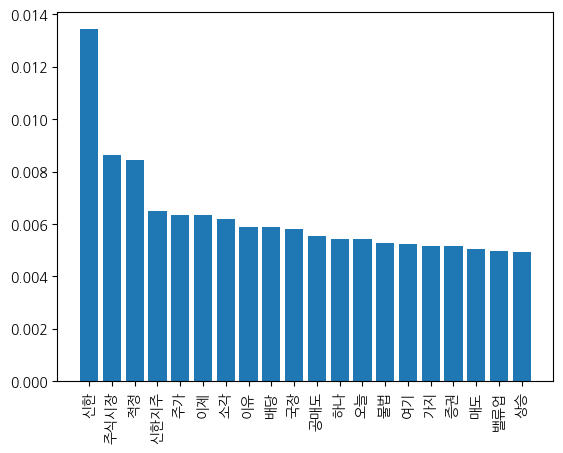

In [88]:
plt.bar(x = cv.get_feature_names_out()[idx],
           height = model.feature_importances_[idx])

plt.xticks(rotation = 90) 
plt.show() 

**오즈비 분석 : 오르기 전날, 떨어지기 전날 중요 단어들 추출**

In [91]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = TfidfVectorizer()
cv_matrix = cv.fit_transform(df2['Nouns'])
cv_matrix = cv_matrix.toarray()
cv_matrix

#cv.get_features_names_out()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])